In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('fifa_modified1.csv')
names = df.short_name.tolist()
# df.drop(columns=['short_name'],inplace=True)
names
def read_normaliz_pca(scaler,n_columns=10,df=None):
    if df is None:
        df = pd.read_csv('fifa_modified1.csv')
    df.drop(columns=['sofifa_id','nationality','club','player_positions',
                         'preferred_foot','work_rate','body_type','real_face'],inplace=True)
    
    names = df.short_name.tolist()
    df.drop(columns=['short_name'],inplace=True)
    
    # Normalize(Rescale the data)
    # since some columns like wage_eur, value_eur,release_clause_eur have very high values 10000-1000000
    # whereas some columns like international_reputation,weak_foot,skill_moves have values 0-5
    # There for model can be biased towords higher values 
    # Conclusion :- it is good to normalize data to prevent model from overfitting
    x= df.values
    
    x_scaled = scaler.fit_transform(x)
    X_norm= pd.DataFrame(x_scaled)
     
    # since 60 columns means a lot to a model therfore model might not perform well and overfit
    # hence reducing number of columns to n_columns
    pca = PCA(n_components=n_columns)
    reduced = pd.DataFrame(pca.fit_transform(X_norm))
    return reduced

In [3]:
scaler = preprocessing.MinMaxScaler()
reduced = read_normaliz_pca(scaler,n_columns=3)

In [4]:
y_pred = DBSCAN(eps=0.3, min_samples=50).fit_predict(reduced)

In [5]:
y_pred[:10]

array([-1, -1, -1,  1, -1, -1, -1,  0, -1,  0], dtype=int64)

In [6]:
reduced['cluster'] = y_pred

In [7]:
reduced.head()

0         1         2  cluster
0 -1.862262 -1.173054  1.172353       -1
1 -1.719352 -1.061111  1.201491       -1
2 -1.731313 -1.316372  0.922977       -1
3  1.839711 -0.284614  1.488981        1
4 -1.647686 -1.149565  0.897448       -1

In [8]:
def visualize_clusters(reduced):
    plt.figure(figsize=(10,10))
    sns.set(style='white')
    ax = sns.lmplot(x='x',y='y',hue='cluster',data=reduced,legend = False,height=7,scatter_kws={'s':150})


    ax.set(ylim=(-2,2))
    plt.tick_params(labelsize=15)
    plt.xlabel('PC 1',fontsize=20)
    plt.ylabel('PC 2',fontsize=20)
    plt.show()

<Figure size 720x720 with 0 Axes>

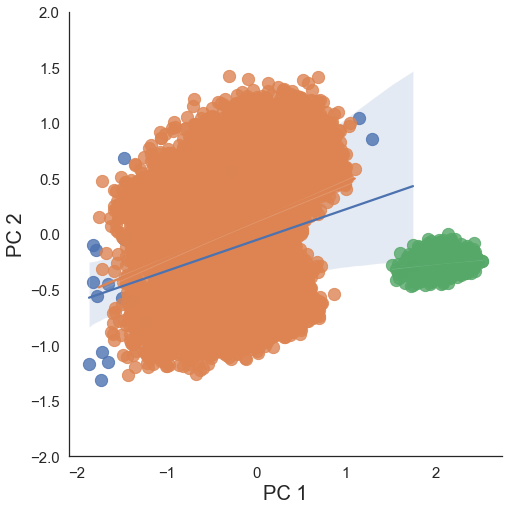

In [9]:
columns = ['x','y','z','cluster','name']
reduced['names'] = names
reduced.columns=columns
visualize_clusters(reduced)

In [10]:
def visualize_3D(data):
    import plotly.graph_objects as go  #for 3D plot
    reduced = data
    ## K-means using k = 4

    ## 3D plot 
    Scene = dict(xaxis = dict(title  = 'Pc1'),yaxis = dict(title  = 'Pc2'),zaxis = dict(title  = 'Pc3'))

    # labels = kmeans.labels_
    trace = go.Scatter3d(x=reduced.x, y=reduced.y, z=reduced.z,hovertext=reduced.name, mode='markers',marker=dict(color = reduced.cluster, size= 10, line=dict(color= 'black',width = 10)))
    layout = go.Layout(margin=dict(l=0,r=0),scene = Scene,height = 800,width = 800)
    data = [trace]
    fig = go.Figure(data = data, layout = layout)
    fig.show()

In [11]:
visualize_3D(reduced)